<center>
<h4>Diplomatura Datos 2023 - FaMAF - UNC</h4>
<h2>Aplicando Machine Learning para predicción de demanda</h2>
<h2><span style="color: orange;">Introducción al Aprendizaje Supervisado en Series de Tiempo</span></h2>
</center>
</left>
<h4>Tutor: Sebastián Ormaechea</h4>
</left>

## Objetivo general

El objetivo final de la mentoría es poder predecir el próximo mes de venta de materiales en los diferentes países y zonas en donde opera la compañía proveedora. Sin embargo, los prácticos que se realizarán en esta mentoría son aplicables a compañías de cualquier vertical de negocio que quiera predecir la demanda.

<h2><span style="color: orange;">Objetivos de este notebook</span></h2>

En la presente notebook, se presentará la consigna a seguir para el tercer práctico correspondiente a las materias Introducción al Aprendizaje Automático y Aprendizaje Automático Supervisado. En la notebook se enumeran las consignas que permitirán implementar los pasos necesarios en la aplicación de diferentes métodos de aprendizaje supervisado y el desarrollo de gráficas de interpretación de resultados. Se realizan experimentos reproducibles para luego proceder a la evaluación de los métodos mas convenientes y la selección de hiperparámetros a partir del cálculo de las métricas pertinentes.</span></h2>


## Requisitos de aprobación

- Trabajo grupal: El trabajo debe ser realizado entre los integrantes del grupo asignado y solo se entrega una versión por grupo.
- Git: Deben armar un repositorio git donde vayan cargando cada uno de los prácticos (notebooks) de la mentoría.
- Informe: Este debe quedar integrado en el mismo notebook por lo que recomiendo sigan un esquema que contenga las siguientes secciones. La idea es que queden plasmados los hallazgos significativos encontrados, lo cual sirve además de base para los videos intermedio y final de la mentoria.
              - Introducción
              - Presentación del Dataset
              - Variables más relevantes o de interés
              - Respuestas a preguntas disparadoras
              - Relaciones interesantes entre variables
              - Principales conclusiones          
- Prolijidad y Claridad: Es muy importante no solo resolver las consignas técnicamente sino tambien tener la claridad en la comunicación de los hallazgos, exponer las conclusiones y tener poder de síntesis. Por ello, la presentación debe ser acompañada de los gráficos adecuados y las referencias correspondientes. Los graficos deben hablar por si mismos.
- Extensión: No hay límite de longitud en los notebooks, pero es importante que eviten salidas o outputs excesivamente extensos de cada celda del notebook, salvo que estén debidamente justificados.  

<span style="color: orange;">Fecha de Entrega del presente práctico: 11/09/2023</span>

<h2><span style="color: orange;">Introducción</span></h2>

Para cumplir con el objetivo de la mentoria necesitamos entender que nuestro dataset es una series de tiempo.
Las series temporales son conjuntos de datos secuenciales que representan observaciones recopiladas a lo largo del tiempo en intervalos regulares. Estas observaciones pueden estar vinculadas a diferentes fenómenos, como el precio de las acciones, la temperatura diaria, la producción de energía o el tráfico web. El análisis de series temporales es una disciplina fundamental en estadísticas y aprendizaje automático, ya que permite extraer patrones, identificar tendencias y realizar pronósticos para predecir eventos futuros basados en el comportamiento pasado.

Uno de los aspectos críticos en el análisis de series temporales es la dependencia temporal de los datos, es decir, cómo las observaciones pasadas pueden influir en las futuras. Para capturar esta dependencia, se utilizan los lags, que son valores pasados de la serie temporal que se añaden como características para cada punto de tiempo.

La construcción de lags implica tomar una observación en un punto de tiempo específico (t) y usar las observaciones previas a este punto para crear variables predictoras adicionales. Estos lags se incorporan como variables independientes en un modelo predictivo y permiten capturar la relación temporal entre los datos.

Por ejemplo, consideremos una serie temporal que representa la demanda diaria de productos en una tienda durante un año. Si queremos predecir la demanda del día actual (t) utilizando la demanda de los tres días anteriores, crearíamos tres lags: un lag de orden 1 (t-1), un lag de orden 2 (t-2) y un lag de orden 3 (t-3). Estos lags actuarían como características para predecir el valor de la demanda en el día actual.

La elección adecuada del número de lags y su longitud depende del problema específico y de la naturaleza de los datos. Demasiados lags pueden introducir ruido y complejidad innecesaria, mientras que muy pocos pueden no capturar toda la información relevante para hacer buenas predicciones.

Es importante tener en cuenta que al trabajar con lags, debemos asegurarnos de que los datos se encuentren en orden cronológico, por lo que el ordenamiento del dataset es crítico antes de implementar la construcción de lags. Además, es necesario considerar técnicas como el relleno de valores faltantes para evitar problemas al crear los lags.

En síntesis, los lags son una herramienta fundamental en el análisis de series temporales, ya que permiten modelar la dependencia temporal y mejorar la capacidad predictiva de los modelos. Con ellos, podemos transformar una secuencia de datos en una matriz de características adecuadamente estructurada para aplicar técnicas de aprendizaje automático y realizar pronósticos precisos en una variedad de situaciones.</

### Importacion de librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Consignas

El desarrollo de experimentos de Machine Learning implica diferentes pasos sobre los cuales tomamos decisiones sobre el dataset, los algoritmos que usamos e incluso los hiperámetros que probamos. Esto genera un sinnúmero de caminos que se pueden tomar para llegar al resultado final. A fin de no diversificar tanto los caminos y disminuir la complejidad de los experimentos, en las consignas que siguen he establecido pautas mínimas de trabajo. Por favor, aténganse a ellas y si desean explorar más experimentos, será muy bien recibido.

### Carga de dataset curado

A los fines de realizar este práctico, utilizaremos el dataset curado en el práctico anterior.

In [2]:
#from google.colab import files
#uploaded = files.upload()

In [3]:
# Carga del dataset curado
df = pd.read_csv('df_final_not_encoded.csv')
df

Fecha  PosPedido  CodMaterial  Cantidad  CodGrupoArt  \
0       2021-11-01       10.0        81074       480         14.0   
1       2018-02-01      930.0         8051        24         11.0   
2       2018-08-01      130.0         8051        24         11.0   
3       2018-11-01      790.0         8051        24         11.0   
4       2019-01-01      790.0         8051       -24         11.0   
...            ...        ...          ...       ...          ...   
107784  2021-06-01       20.0        45115         6         11.0   
107785  2021-06-01       10.0        45114        24         11.0   
107786  2021-08-01       10.0        45114        24         11.0   
107787  2021-06-01       20.0        45115        12         11.0   
107788  2021-08-01       20.0        45115        12         11.0   

       GrupoArticulos  codGrupoMaterial2  codGrupoMaterial4  \
0          Corrosivos               27.0              284.0   
1          Espesantes               15.0              139.0   
2          Espesantes               15.0              139.0   
3          Espesantes               15.0              139.0   
4          Espesantes               15.0              139.0   
...               ...                ...                ...   
107784     Espesantes               26.0              124.0   
107785     Espesantes               26.0              124.0   
107786     Espesantes               26.0              124.0   
107787     Espesantes               26.0              124.0   
107788     Espesantes               26.0              124.0   

        codGrupoMaterial5  Tipo_Precio     Departamento     Localidad  \
0                   674.0         10.0  LOMAS DE ZAMORA     TEMPERLEY   
1                   291.0          1.0   TERCERO ARRIBA         OLIVA   
2                   291.0          1.0   TERCERO ARRIBA         OLIVA   
3                   291.0          1.0   TERCERO ARRIBA         OLIVA   
4                   291.0          1.0   TERCERO ARRIBA         OLIVA   
...                   ...          ...              ...           ...   
107784              228.0          9.0          ROSARIO       ROSARIO   
107785              228.0          9.0          QUILMES  BERNAL OESTE   
107786              228.0          9.0          QUILMES  BERNAL OESTE   
107787              228.0          9.0          QUILMES  BERNAL OESTE   
107788              228.0          9.0          QUILMES  BERNAL OESTE   

           Provincia Pais  CodCliente_of  CodSucCliente_of  NroDocPedido  \
0       Buenos Aires   AR              1                 1      514585.0   
1            Córdoba   AR              2                 2      232161.0   
2            Córdoba   AR              2                 2      260497.0   
3            Córdoba   AR              2                 2      281670.0   
4            Córdoba   AR              2                 2      281670.0   
...              ...  ...            ...               ...           ...   
107784      Santa Fé   AR           1670              2243      479785.0   
107785  Buenos Aires   AR           1671              2244      481967.0   
107786  Buenos Aires   AR           1671              2244      491293.0   
107787  Buenos Aires   AR           1671              2244      481967.0   
107788  Buenos Aires   AR           1671              2244      491293.0   

         Año  Mes  
0       2021   11  
1       2018    2  
2       2018    8  
3       2018   11  
4       2019    1  
...      ...  ...  
107784  2021    6  
107785  2021    6  
107786  2021    8  
107787  2021    6  
107788  2021    8  

[107789 rows x 19 columns]

### Columnas a utilizar

Seleccionamos solo las columnas: 'Cantidad', 'Fecha', 'GrupoArticulos', 'codGrupoMaterial2', 'Provincia'. Como verán, solo he seleccionado "Provincia" de las variables disponibles de localización (País, Provincia, Departamento, Localidad). Además, solo he dejado algunas del resto de las variables predictoras. La idea es que trabajemos todos con las mismas columnas para no ramificar tanto los posibles experimentos, pero fundamentalmente para acelerar los tiempos de cómputo.
Dado que probablemente ya tengan codificadas muchas columnas, seleccionen solo las codificaciones que correspondan a esta lista.

NOTA : FIJENSE QUE LAS COLUMNAS "GrupoArticulos" Y "codGrupoMaterial2" ESTAN CORELACIONADAS, LOS CODIGOS 15 Y 26 SON "Espesantes" Y 27 SOLO ES "Corrosivos", ASI QUE SE PODRIA USAR SOLO LA COLUMNA "codGrupoMaterial2" Y CAMBIARLES LOS NOMBRES COMO LO HAGO EN LAS CELDAS COMENTADAS. SI ESTAN DE ACUERDO, LA USAMOS, SINO NO.

In [4]:
"""
# Defino las variables de interés para trabajar en este TP
df = df[['Fecha','Cantidad','codGrupoMaterial2','Provincia']]
df
"""

"\n# Defino las variables de interés para trabajar en este TP\ndf = df[['Fecha','Cantidad','codGrupoMaterial2','Provincia']]\ndf\n"

In [5]:
"""
# Diccionario de codificación que relaciona valores numéricos con etiquetas descriptivas
codificacion = {15.0: 'Espesante_1',
                26.0: 'Espesante_2',
                27.0: 'Corrosivo_1'
                }

# Mapear los valores en la columna 'codGrupoMaterial2' utilizando el diccionario de codificación
df['codGrupoMaterial2'] = df['codGrupoMaterial2'].map(codificacion)
df
"""

"\n# Diccionario de codificación que relaciona valores numéricos con etiquetas descriptivas\ncodificacion = {15.0: 'Espesante_1',\n                26.0: 'Espesante_2',\n                27.0: 'Corrosivo_1'\n                }\n\n# Mapear los valores en la columna 'codGrupoMaterial2' utilizando el diccionario de codificación\ndf['codGrupoMaterial2'] = df['codGrupoMaterial2'].map(codificacion)\ndf\n"

In [6]:
# Defino las variables de interés para trabajar en este TP
df = df[['Cantidad', 'Fecha', 'GrupoArticulos', 'codGrupoMaterial2', 'Provincia']]
df

Cantidad       Fecha GrupoArticulos  codGrupoMaterial2     Provincia
0            480  2021-11-01     Corrosivos               27.0  Buenos Aires
1             24  2018-02-01     Espesantes               15.0       Córdoba
2             24  2018-08-01     Espesantes               15.0       Córdoba
3             24  2018-11-01     Espesantes               15.0       Córdoba
4            -24  2019-01-01     Espesantes               15.0       Córdoba
...          ...         ...            ...                ...           ...
107784         6  2021-06-01     Espesantes               26.0      Santa Fé
107785        24  2021-06-01     Espesantes               26.0  Buenos Aires
107786        24  2021-08-01     Espesantes               26.0  Buenos Aires
107787        12  2021-06-01     Espesantes               26.0  Buenos Aires
107788        12  2021-08-01     Espesantes               26.0  Buenos Aires

[107789 rows x 5 columns]

En los prácticos anterior se estuvo explorando distintas posibilidades respecto a las variables categóricas. en particular, se exploraron 2 métodos de codificaión de este tipo de variables:

* One-Hot Encoding: Esta técnica crea columnas binarias para cada categoría única en las variables categóricas que se consideren. Esta técnica es útil cuando el número de categorías únicas no es muy grande y tienes suficiente capacidad computacional para manejar el aumento en el tamaño del DataFrame.

* Label Encoding: En lugar de crear nuevas columnas binarias, el Label Encoding asigna un número entero a cada categoría única en la variable a manejar. Es una opción más compacta que One-Hot Encoding, pero puede introducir sesgo en el modelo, ya que el modelo puede interpretar implícitamente una relación de orden entre ellas, lo que podría introducir sesgos en las predicciones.

Se decidió utilizar ambos tipos de codificación para poder comparar rendimientos y hacer un analisis sobre el efecto de estos sobre los distintos modelos.

### Codificación de categóricas

En primer lugar se procedió a hacer la codificación de las variables categoricas **"GrupoArticulos"** y **"codGrupoMaterial2"**, donde esta ultima, aunque tiene valores numéricos, representan categorias.

Se dejó para luego la codificacion de la variable de localización.

Para realizar las distintas codificaciones se armaron funciones que luego fueron implementadas sobre los distintos set de datos. Primero, se armó la funcion para implementar el "One-Hot Encoding".

In [7]:
def one_hot_encode_columns(df, columns):

    df_encoded = df.copy()
    encoder = OneHotEncoder(sparse=False)  # sparse=False para obtener un array NumPy

    for column in columns:
        # Ajusta y transforma la columna categórica
        encoded_column = encoder.fit_transform(df_encoded[[column]])
        # Crea nombres de columna para las nuevas características
        new_columns = [f'{column}_{cat}' for cat in encoder.categories_[0][:]]
        # Crea un DataFrame temporal con las características codificadas
        df_encoded = pd.concat([df_encoded, pd.DataFrame(encoded_column, columns=new_columns)], axis=1)

    return df_encoded

In [8]:
# Codificación de categóricas sin inluir Provincia, con One-Hot Encoding
# Realizar la codificación
columnas_categoricas = ['GrupoArticulos', 'codGrupoMaterial2']
df_hot = one_hot_encode_columns(df, columnas_categoricas)
df_hot

Cantidad       Fecha GrupoArticulos  codGrupoMaterial2     Provincia  \
0            480  2021-11-01     Corrosivos               27.0  Buenos Aires   
1             24  2018-02-01     Espesantes               15.0       Córdoba   
2             24  2018-08-01     Espesantes               15.0       Córdoba   
3             24  2018-11-01     Espesantes               15.0       Córdoba   
4            -24  2019-01-01     Espesantes               15.0       Córdoba   
...          ...         ...            ...                ...           ...   
107784         6  2021-06-01     Espesantes               26.0      Santa Fé   
107785        24  2021-06-01     Espesantes               26.0  Buenos Aires   
107786        24  2021-08-01     Espesantes               26.0  Buenos Aires   
107787        12  2021-06-01     Espesantes               26.0  Buenos Aires   
107788        12  2021-08-01     Espesantes               26.0  Buenos Aires   

        GrupoArticulos_Corrosivos  GrupoArticulos_Espesantes  \
0                             1.0                        0.0   
1                             0.0                        1.0   
2                             0.0                        1.0   
3                             0.0                        1.0   
4                             0.0                        1.0   
...                           ...                        ...   
107784                        0.0                        1.0   
107785                        0.0                        1.0   
107786                        0.0                        1.0   
107787                        0.0                        1.0   
107788                        0.0                        1.0   

        codGrupoMaterial2_15.0  codGrupoMaterial2_26.0  codGrupoMaterial2_27.0  
0                          0.0                     0.0                     1.0  
1                          1.0                     0.0                     0.0  
2                          1.0                     0.0                     0.0  
3                          1.0                     0.0                     0.0  
4                          1.0                     0.0                     0.0  
...                        ...                     ...                     ...  
107784                     0.0                     1.0                     0.0  
107785                     0.0                     1.0                     0.0  
107786                     0.0                     1.0                     0.0  
107787                     0.0                     1.0                     0.0  
107788                     0.0                     1.0                     0.0  

[107789 rows x 10 columns]

Luego, se hizo la funcion para la implementacion del "Label Encoding".

In [9]:
def label_encode_columns(df, columns):
    # Copiar el DataFrame original para evitar modificar el original
    df_encoded = df.copy()

    # Crear una instancia de LabelEncoder
    label_encoder = LabelEncoder()

    # Iterar sobre las columnas categóricas especificadas
    for column in columns:
        # Aplicar LabelEncoder a la columna categórica actual y reemplazar los valores con las etiquetas codificadas
        df_encoded[column+ '_encoded'] = label_encoder.fit_transform(df[column])

    # Devolver el DataFrame con las columnas codificadas
    return df_encoded

In [10]:
# Codificación de categóricas sin inluir Provincia, con Label Encoding
# Realizar la codificación
df_lab = label_encode_columns(df, columnas_categoricas)
df_lab

Cantidad       Fecha GrupoArticulos  codGrupoMaterial2     Provincia  \
0            480  2021-11-01     Corrosivos               27.0  Buenos Aires   
1             24  2018-02-01     Espesantes               15.0       Córdoba   
2             24  2018-08-01     Espesantes               15.0       Córdoba   
3             24  2018-11-01     Espesantes               15.0       Córdoba   
4            -24  2019-01-01     Espesantes               15.0       Córdoba   
...          ...         ...            ...                ...           ...   
107784         6  2021-06-01     Espesantes               26.0      Santa Fé   
107785        24  2021-06-01     Espesantes               26.0  Buenos Aires   
107786        24  2021-08-01     Espesantes               26.0  Buenos Aires   
107787        12  2021-06-01     Espesantes               26.0  Buenos Aires   
107788        12  2021-08-01     Espesantes               26.0  Buenos Aires   

        GrupoArticulos_encoded  codGrupoMaterial2_encoded  
0                            0                          2  
1                            1                          0  
2                            1                          0  
3                            1                          0  
4                            1                          0  
...                        ...                        ...  
107784                       1                          1  
107785                       1                          1  
107786                       1                          1  
107787                       1                          1  
107788                       1                          1  

[107789 rows x 7 columns]

### Codificación de "Provincia"

Finalmente, una vez realizadas las codificaciones de las variables categoricas y teniendo ya las funciones listas para usar,nos falta ver qué hacer con la variable de Localizacion.

Para este trabajo se decidió utilizar la varaible "Provincia", ya que tiene una cantidad de valores unicos suficientemente grande como para dar informacion sobre la variabilidad de lugares donde se desarrolla la empresa, pero a la vez reducido para poder ser procesados con los recursos computacionales disponibles.

Nuevamente aplicaremos por separado las dos opciones de codificación. De esta manera, obtendremos dos datasets con diferente tipo de curación.

In [11]:
# Codificación de Provincia, con One-Hot Encoding
# Realizar la codificación
df_hot = one_hot_encode_columns(df_hot, ['Provincia'])
df_hot

Cantidad       Fecha GrupoArticulos  codGrupoMaterial2     Provincia  \
0            480  2021-11-01     Corrosivos               27.0  Buenos Aires   
1             24  2018-02-01     Espesantes               15.0       Córdoba   
2             24  2018-08-01     Espesantes               15.0       Córdoba   
3             24  2018-11-01     Espesantes               15.0       Córdoba   
4            -24  2019-01-01     Espesantes               15.0       Córdoba   
...          ...         ...            ...                ...           ...   
107784         6  2021-06-01     Espesantes               26.0      Santa Fé   
107785        24  2021-06-01     Espesantes               26.0  Buenos Aires   
107786        24  2021-08-01     Espesantes               26.0  Buenos Aires   
107787        12  2021-06-01     Espesantes               26.0  Buenos Aires   
107788        12  2021-08-01     Espesantes               26.0  Buenos Aires   

        GrupoArticulos_Corrosivos  GrupoArticulos_Espesantes  \
0                             1.0                        0.0   
1                             0.0                        1.0   
2                             0.0                        1.0   
3                             0.0                        1.0   
4                             0.0                        1.0   
...                           ...                        ...   
107784                        0.0                        1.0   
107785                        0.0                        1.0   
107786                        0.0                        1.0   
107787                        0.0                        1.0   
107788                        0.0                        1.0   

        codGrupoMaterial2_15.0  codGrupoMaterial2_26.0  \
0                          0.0                     0.0   
1                          1.0                     0.0   
2                          1.0                     0.0   
3                          1.0                     0.0   
4                          1.0                     0.0   
...                        ...                     ...   
107784                     0.0                     1.0   
107785                     0.0                     1.0   
107786                     0.0                     1.0   
107787                     0.0                     1.0   
107788                     0.0                     1.0   

        codGrupoMaterial2_27.0  ...  Provincia_Neuquen  Provincia_Rio Negro  \
0                          1.0  ...                0.0                  0.0   
1                          0.0  ...                0.0                  0.0   
2                          0.0  ...                0.0                  0.0   
3                          0.0  ...                0.0                  0.0   
4                          0.0  ...                0.0                  0.0   
...                        ...  ...                ...                  ...   
107784                     0.0  ...                0.0                  0.0   
107785                     0.0  ...                0.0                  0.0   
107786                     0.0  ...                0.0                  0.0   
107787                     0.0  ...                0.0                  0.0   
107788                     0.0  ...                0.0                  0.0   

        Provincia_Salta  Provincia_San Juan  Provincia_San Luis  \
0                   0.0                 0.0                 0.0   
1                   0.0                 0.0                 0.0   
2                   0.0                 0.0                 0.0   
3                   0.0                 0.0                 0.0   
4                   0.0                 0.0                 0.0   
...                 ...                 ...                 ...   
107784              0.0                 0.0                 0.0   
107785              0.0                 0.0                 0.0   
107786              0.0      

In [12]:
# Codificación de Provincia, con Label Encoding
# Realizar la codificación
df_lab = label_encode_columns(df_lab, ['Provincia'])
df_lab

Cantidad       Fecha GrupoArticulos  codGrupoMaterial2     Provincia  \
0            480  2021-11-01     Corrosivos               27.0  Buenos Aires   
1             24  2018-02-01     Espesantes               15.0       Córdoba   
2             24  2018-08-01     Espesantes               15.0       Córdoba   
3             24  2018-11-01     Espesantes               15.0       Córdoba   
4            -24  2019-01-01     Espesantes               15.0       Córdoba   
...          ...         ...            ...                ...           ...   
107784         6  2021-06-01     Espesantes               26.0      Santa Fé   
107785        24  2021-06-01     Espesantes               26.0  Buenos Aires   
107786        24  2021-08-01     Espesantes               26.0  Buenos Aires   
107787        12  2021-06-01     Espesantes               26.0  Buenos Aires   
107788        12  2021-08-01     Espesantes               26.0  Buenos Aires   

        GrupoArticulos_encoded  codGrupoMaterial2_encoded  Provincia_encoded  
0                            0                          2                  0  
1                            1                          0                  7  
2                            1                          0                  7  
3                            1                          0                  7  
4                            1                          0                  7  
...                        ...                        ...                ...  
107784                       1                          1                 22  
107785                       1                          1                  0  
107786                       1                          1                  0  
107787                       1                          1                  0  
107788                       1                          1                  0  

[107789 rows x 8 columns]

### Contrucción de lags

Para poder hacer predicciones sobre futuras ventas, es necesario que cualquier modelo aprenda sobre comportamientos de ventas anteriores. Para esto, se usó el metodo de construccion de lags, que permite crear columnas con datos a partir de valores cronologicamente anteriores.

En primer lugar, se hizo el tratamiento de las fechas, donde se hicieron las distintas transacciones.

In [13]:
def preparar_dataframe(df):

    # Paso 1: Convertir la columna en formato de fecha y hora
    df['Fecha'] = pd.to_datetime(df['Fecha'])

    # Paso 2: Ordenar los datos cronológicamente por la columna 'Provincia' y 'Fecha'
    df = df.sort_values(by = ['Provincia', 'Fecha'])

    # Paso 3: Establecer la columna como el índice
    df.set_index('Fecha', inplace=True)

    return df

In [14]:
df_hot = preparar_dataframe(df_hot)
df_lab = preparar_dataframe(df_lab)

In [15]:
# Paso 3: Crear las columnas de lags

# Definimos la función que calcula n valores anteriores de una columna dada
def shift_df(df, n_lags, shifted_column, groupCol):
    for i in range(1, n_lags+1):
        # Usamos groupby para agrupar por las columnas 'groupCol'

        # Luego, aplicamos shift(i) a la columna 'shifted_column' para calcular n periodos hacia atrás
        df['t-{}'.format(i)] = df.groupby(groupCol, as_index=False)[shifted_column].shift(i)

        # Llenar los valores NaN con ceros (0)
        df.fillna(0, inplace=True)
    return df

# Aplicamos la función para calcular n periodos hacia atrás de la variable objetivo
# 'n_lags' representa la cantidad de periodos hacia atrás que deseamos calcular
# 'shifted_column' es la columna de la que se calcularán los lags
# 'groupCol' es la columna por la cual se agruparán los datos antes de calcular los lags

Con esta funcion, construimos las columnas con los lags para cada set de datos con las distintas codificaciones.

Para este trabajo se decidió construir 7 columnas, con los valores de las 7 transacciones anteriores para cada producto, y para cada provincia.

In [16]:
df_hot = shift_df(df_hot, 7, 'Cantidad', 'Provincia')
df_hot

Cantidad GrupoArticulos  codGrupoMaterial2     Provincia  \
Fecha                                                                  
2018-01-01         6     Espesantes               15.0  Buenos Aires   
2018-01-01        -6     Espesantes               15.0  Buenos Aires   
2018-01-01         6     Espesantes               15.0  Buenos Aires   
2018-01-01        -6     Espesantes               15.0  Buenos Aires   
2018-01-01         6     Espesantes               15.0  Buenos Aires   
...              ...            ...                ...           ...   
2021-11-01        60     Espesantes               26.0       Tucumán   
2021-11-01        12     Corrosivos               27.0       Tucumán   
2021-11-01        24     Corrosivos               27.0       Tucumán   
2021-11-01        24     Corrosivos               27.0       Tucumán   
2021-11-01        24     Corrosivos               27.0       Tucumán   

            GrupoArticulos_Corrosivos  GrupoArticulos_Espesantes  \
Fecha                                                              
2018-01-01                        0.0                        1.0   
2018-01-01                        0.0                        1.0   
2018-01-01                        0.0                        1.0   
2018-01-01                        0.0                        1.0   
2018-01-01                        0.0                        1.0   
...                               ...                        ...   
2021-11-01                        0.0                        1.0   
2021-11-01                        1.0                        0.0   
2021-11-01                        1.0                        0.0   
2021-11-01                        1.0                        0.0   
2021-11-01                        1.0                        0.0   

            codGrupoMaterial2_15.0  codGrupoMaterial2_26.0  \
Fecha                                                        
2018-01-01                     1.0                     0.0   
2018-01-01                     1.0                     0.0   
2018-01-01                     1.0                     0.0   
2018-01-01                     1.0                     0.0   
2018-01-01                     1.0                     0.0   
...                            ...                     ...   
2021-11-01                     0.0                     1.0   
2021-11-01                     0.0                     0.0   
2021-11-01                     0.0                     0.0   
2021-11-01                     0.0                     0.0   
2021-11-01                     0.0                     0.0   

            codGrupoMaterial2_27.0  Provincia_Buenos Aires  ...  \
Fecha                                                       ...   
2018-01-01                     0.0                     1.0  ...   
2018-01-01                     0.0                     1.0  ...   
2018-01-01                     0.0                     1.0  ...   
2018-01-01                     0.0                     1.0  ...   
2018-01-01                     0.0                     1.0  ...   
...                            ...                     ...  ...   
2021-11-01                     0.0                     0.0  ...   
2021-11-01                     1.0                     0.0  ...   
2021-11-01                     1.0                     0.0  ...   
2021-11-01                     1.0                     0.0  ...   
2021-11-01                     1.0                     0.0  ...   

            Provincia_Santiago del Estero  Provincia_Tierra del Fuego  \
Fecha                                                                   
2018-01-01                            0.0                         0.0   
2018-01-01                            0.0                         0.0   
2018-01-01                            0.0                         0.0   
2018-01-01                            0.0                         0.0   
2018-01-01                            0.0                         0.0   


In [17]:
df_lab = shift_df(df_lab, 7, 'Cantidad', 'Provincia')
df_lab

Cantidad GrupoArticulos  codGrupoMaterial2     Provincia  \
Fecha                                                                  
2018-01-01         6     Espesantes               15.0  Buenos Aires   
2018-01-01        -6     Espesantes               15.0  Buenos Aires   
2018-01-01         6     Espesantes               15.0  Buenos Aires   
2018-01-01        -6     Espesantes               15.0  Buenos Aires   
2018-01-01         6     Espesantes               15.0  Buenos Aires   
...              ...            ...                ...           ...   
2021-11-01        60     Espesantes               26.0       Tucumán   
2021-11-01        12     Corrosivos               27.0       Tucumán   
2021-11-01        24     Corrosivos               27.0       Tucumán   
2021-11-01        24     Corrosivos               27.0       Tucumán   
2021-11-01        24     Corrosivos               27.0       Tucumán   

            GrupoArticulos_encoded  codGrupoMaterial2_encoded  \
Fecha                                                           
2018-01-01                       1                          0   
2018-01-01                       1                          0   
2018-01-01                       1                          0   
2018-01-01                       1                          0   
2018-01-01                       1                          0   
...                            ...                        ...   
2021-11-01                       1                          1   
2021-11-01                       0                          2   
2021-11-01                       0                          2   
2021-11-01                       0                          2   
2021-11-01                       0                          2   

            Provincia_encoded   t-1    t-2    t-3    t-4    t-5    t-6    t-7  
Fecha                                                                          
2018-01-01                  0   0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2018-01-01                  0   6.0    0.0    0.0    0.0    0.0    0.0    0.0  
2018-01-01                  0  -6.0    6.0    0.0    0.0    0.0    0.0    0.0  
2018-01-01                  0   6.0   -6.0    6.0    0.0    0.0    0.0    0.0  
2018-01-01                  0  -6.0    6.0   -6.0    6.0    0.0    0.0    0.0  
...                       ...   ...    ...    ...    ...    ...    ...    ...  
2021-11-01                 25  30.0  180.0  240.0  120.0   30.0  480.0  360.0  
2021-11-01                 25  60.0   30.0  180.0  240.0  120.0   30.0  480.0  
2021-11-01                 25  12.0   60.0   30.0  180.0  240.0  120.0   30.0  
2021-11-01                 25  24.0   12.0   60.0   30.0  180.0  240.0  120.0  
2021-11-01                 25  24.0   24.0   12.0   60.0   30.0  180.0  240.0  

[107789 rows x 14 columns]

In [18]:
df_hot = df_hot.drop(['GrupoArticulos', 'codGrupoMaterial2', 'Provincia'], axis = 1)
df_lab = df_lab.drop(['GrupoArticulos', 'codGrupoMaterial2', 'Provincia'], axis = 1)

Una vez obtuvimos los set de datos, y teniendo en cuenta que hay modelos que requieren un preprocesamiento de los datos que usaran para ser entrenados, se creó una funcion que hara una normalizacion de los datos en el rango de -1 a 1. Se tomó este rango debido a la presencia de valores negativos que, como se vió antes, representan devoluciones de mercancia.

Ademas, esta funcion divide el set de datos en varaibles predictorias y variable objetivo. Por ultimo, tambien devuelve el metodo escalador, en caso de que sea requerido para una transformacion inversa.

In [19]:
# Definir la función que normaliza un DataFrame
def normalize_dataframe(input_df):
    # Crear objetos MinMaxScaler para normalizar las características (variables independientes)
    scaler_x = MinMaxScaler(feature_range=(-1, 1))

    # Separar las características (x) y la variable objetivo (y) del DataFrame de entrada
    x = input_df.drop(['Cantidad'], axis=1)  # x contiene todas las columnas excepto 'Cantidad'
    y = input_df[['Cantidad']]  # y contiene solo la columna 'Cantidad'

    # Normalizar los valores de las características (x)
    normalized_x_data = scaler_x.fit_transform(x)

    # Crear un nuevo DataFrame a partir de los datos normalizados con las mismas columnas e índice que el original
    normalized_x_df = pd.DataFrame(normalized_x_data, columns=x.columns, index=x.index)

    # Devolver el DataFrame normalizado de características (x), la variable objetivo (y) y el objeto scaler_x
    return x, y, normalized_x_df, scaler_x


Se aplicó la funcion y se transformaron los datos, obteniendose así los set de datos ya separados y normalizados.

In [20]:
x_hot, y_hot, x_std_hot, scaler_x_hot = normalize_dataframe(df_hot)
x_lab, y_lab, x_std_lab, scaler_x_lab = normalize_dataframe(df_lab)

### División en Train/Test

Finalmente, estámos en condiciones de **dividir el dataset en Train y Test**. Teniendo en cuenta que estamos utilizando series temporales la división de train y test no puede ser aleatoria sino que debe respetar una linea de tiempo.

Para este trabajo, utilizaremos los datos del año 2021 para test y el resto de datos para el entrenamiento.

In [21]:
# División del dataset en Train y Test de df_hot
x_train_h = x_hot[x_hot.index < '2021-01-01 00:00:00']
x_std_train_h = x_std_hot[x_std_hot.index < '2021-01-01 00:00:00']
y_train_h =  y_hot[y_hot.index < '2021-01-01 00:00:00']

x_test_h = x_hot[x_hot.index >= '2021-01-01 00:00:00']
x_std_test_h = x_std_hot[x_std_hot.index >= '2021-01-01 00:00:00']
y_test_h = y_hot[y_hot.index >= '2021-01-01 00:00:00']

In [22]:
# División del dataset en Train y Test de df_label
x_train_l = x_lab[x_lab.index < '2021-01-01 00:00:00']
y_train_l = y_lab[y_lab.index < '2021-01-01 00:00:00']
x_std_train_l = x_std_lab[x_std_lab.index < '2021-01-01 00:00:00']

x_test_l = x_lab[x_lab.index >= '2021-01-01 00:00:00']
y_test_l = y_lab[y_lab.index >= '2021-01-01 00:00:00']
x_std_test_l = x_std_lab[x_std_lab.index >= '2021-01-01 00:00:00']

### Modelado y evaluación de métricas

Con el fin de experimentar los distintos algoritmos de ML para predecir la demanda se usaron algunos modelos, y separandolos en base a que tipo de datos necesitan para ser entrenados. En particular, los modelos que necesitan ser entrendos con valores normalizados son :

- Linear Support Vector Regression ([Doc](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR))
- Stochastic Gradient Descent ([Doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor))
- KNeighborsRegressor ([Doc](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor))
- Prediction Voting Regressor ([Doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html#sklearn.ensemble.VotingRegressor))

Cabe aclarar que este ultimo, no se ve afectado por la normalizacion de los datos, por lo que tambien se hizo una prueba con datos sin normalizar.

Los modelos que no necesitan ser entrenados con datos normalizados son :

- XGBRegressor  ([Doc](https://xgboost.readthedocs.io/en/latest/python/python_api.html))
- Random Forest Regressor ([Doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html))
- LGBMRegressor ([Doc](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html))

In [23]:
# Definir una lista de tuplas que contiene nombres de estimadores y sus respectivos modelos para VotingRegressor
estimadores_voting = [
    ('linear', LinearRegression()),
    ('tree', DecisionTreeRegressor()),
    ('gbr', GradientBoostingRegressor())
]

# Definir un diccionario de modelos, donde las claves son los nombres de los modelos y los valores son instancias de esos modelos
modelos_std = [
    LinearSVR(),
    SGDRegressor(),
    KNeighborsRegressor(),
    VotingRegressor(estimators=estimadores_voting)
]
modelos_no_std = [
    VotingRegressor(estimators=estimadores_voting),
    XGBRegressor(),
    RandomForestRegressor(),
    LGBMRegressor()
]

Se creó una funcion que evaluo todos los modelos, para asi poder tener metricas de referencia, en base a las cuales poder hacer las comparaciones de rendimiento.

In [24]:
# Definir la función que evalúa varios modelos de regresión
def evaluar_modelos(x_train, y_train, x_test, y_test, modelos):
    resultados = {}

    # Convertir los datos de entrenamiento y prueba en arrays numpy
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)

    # Iterar a través de los modelos en el diccionario 'modelos'
    for modelo in modelos:
        # Crear una instancia del modelo y ajustarla a los datos de entrenamiento
        model = modelo
        model.fit(x_train, y_train)

        # Realizar predicciones en el conjunto de datos de prueba
        y_pred = model.predict(x_test)

        # Calcular métricas de evaluación como el MAE, MSE y R^2
        MAE = mean_absolute_error(y_test, y_pred)
        MSE = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Almacenar los resultados en el diccionario 'resultados'
        resultados[modelo.__class__.__name__] = {
            "MAE": MAE,
            "MSE": MSE,
            "R^2": r2
        }

    # Devolver un diccionario de resultados que contiene métricas de evaluación para cada modelo
    return resultados

A partir de este punto cabe recordar que todos los resultados se dividiran en 4 grupos. Primero se dividen segun el tipo de codificacion que recibio el set de datos (One-Hot o Label Encoding), y luego segun el tipo de datos que fue utilizado (Normalizados o no).

In [25]:
# Ejemplo de uso para df_hot y df_label con todos los modelos del diccionario modelos
resultados_std_hot = evaluar_modelos(x_std_train_h, y_train_h, x_std_test_h, y_test_h, modelos_std)
resultados_hot = evaluar_modelos(x_train_h, y_train_h, x_test_h, y_test_h, modelos_no_std)

resultados_std_label = evaluar_modelos(x_std_train_l, y_train_l, x_std_test_l, y_test_l, modelos_std)
resultados_label = evaluar_modelos(x_train_l, y_train_l, x_test_l, y_test_l, modelos_no_std)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1077
[LightGBM] [Info] Number of data points in the train set: 85059, number of used features: 38
[LightGBM] [Info] Start training from score 21.203565
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1046
[LightGBM] [Info] Number of data points in the train set: 85059, number of used features: 10
[LightGBM] [Info] Start training from score 21.203565


In [26]:
def crear_y_procesar_resultados(resultados):
    # Crear un DataFrame a partir de los resultados
    df_resultados = pd.DataFrame(resultados)

    # Transponer el DataFrame para que las columnas sean los modelos y las filas sean las métricas (MAE, MSE, R²)
    df_resultados = df_resultados.transpose()

    # Renombrar las columnas para mayor claridad
    df_resultados.columns = ["MAE", "MSE", "R^2"]

    # Cambiar el formato de visualización de los números para tener 3 decimales
    pd.options.display.float_format = '{:.3f}'.format

    return df_resultados

In [27]:
df_resultados_std_hot = crear_y_procesar_resultados(resultados_std_hot)
df_resultados_std_hot

MAE       MSE    R^2
LinearSVR           23.841 10649.754 -0.005
SGDRegressor        29.847  9907.283  0.065
KNeighborsRegressor 28.223  9837.795  0.071
VotingRegressor     28.680 10342.526  0.024

In [28]:
df_resultados_hot = crear_y_procesar_resultados(resultados_hot)
df_resultados_hot

MAE       MSE   R^2
VotingRegressor       28.474 10257.496 0.032
XGBRegressor          26.881  9957.655 0.060
RandomForestRegressor 28.081  9784.484 0.076
LGBMRegressor         26.015  9031.911 0.147

Conjunto de Resultados con Datos Normalizados:

* LinearSVR: Este modelo muestra un rendimiento muy pobre en todos los aspectos. Tiene un MAE alto de 23.8, un MSE aún más alto de 10647 y un R^2 negativo (-0.005), lo que indica un ajuste extremadamente deficiente a los datos. Es incluso peor que un modelo que predice la media.

* SGDRegressor: Aunque es mejor que LinearSVR, aún muestra un rendimiento limitado. El MAE es de 29.8 y el MSE es de 9870. El R^2 positivo (0.068) sugiere un ajuste ligeramente mejor que LinearSVR, pero sigue siendo insatisfactorio.

* KNeighborsRegressor: Similar a SGDRegressor, este modelo tiene un MAE de 28.3, un MSE de 9849 y un R^2 de 0.070, lo que indica un ajuste limitado a los datos.

* VotingRegressor: Este modelo tampoco mejora significativamente el rendimiento en comparación con los modelos individuales. Tiene un MAE de 28.7, un MSE de 10528 y un R^2 muy bajo (0.006).

Conjunto de Resultados sin Datos Normalizados:

* VotingRegressor: Aunque el R^2 sigue siendo bajo (0.015), es un poco mejor que en el conjunto de datos normalizados. El MAE y el MSE son similares (28.6 y 10432 respectivamente).

* XGBRegressor: Este modelo muestra un rendimiento ligeramente mejor en comparación con VotingRegressor en términos de R^2 (0.060). El MAE es de 26.9 y el MSE es de 9957.

* RandomForestRegressor: El MAE es de 28.2, el MSE es de 9705 y el R^2 es de 0.084, lo que sugiere un ajuste algo mejor que los modelos anteriores.

* LGBMRegressor: LGBMRegressor es el modelo que muestra el mejor rendimiento en términos de R^2 (0.147). Tiene un MAE de 26 y un MSE de 9031.

En general, todos los modelos muestran un ajuste deficiente a los datos, si analizamos el R^2, con LinearSVR siendo el peor. Además, el modelo LGBMRegressor es el modelo con el mejor R^2.

In [29]:
df_resultados_std_label = crear_y_procesar_resultados(resultados_std_label)
df_resultados_std_label

MAE       MSE    R^2
LinearSVR           23.873 10665.748 -0.007
SGDRegressor        29.755  9875.749  0.068
KNeighborsRegressor 28.314 10119.297  0.045
VotingRegressor     28.447 10234.565  0.034

In [30]:
df_resultados_label = crear_y_procesar_resultados(resultados_label)
df_resultados_label

MAE       MSE   R^2
VotingRegressor       28.534 10414.356 0.017
XGBRegressor          26.883  9778.838 0.077
RandomForestRegressor 28.435  9811.128 0.074
LGBMRegressor         26.058  9104.610 0.141

Conjunto de Resultados con Datos Normalizados y Label Encoding:

* LinearSVR: El modelo muestra un rendimiento muy deficiente con un MAE de 23.8 y un MSE alto de 10665 . El R^2 es negativo (-0.007), indicando un ajuste muy pobre a los datos.

* SGDRegressor: Aunque es mejor que LinearSVR, aún muestra un rendimiento limitado. El MAE es de 29.2 y el MSE es de 9861. El R^2 positivo (0.069) sugiere un ajuste ligeramente mejor que LinearSVR, pero sigue siendo insatisfactorio.

* KNeighborsRegressor: Este modelo tiene un MAE de 28.3 y un MSE de 10126. El R^2 es bajo (0.044), lo que indica un ajuste limitado a los datos.

* VotingRegressor: Aunque el R^2 es bajo (0.007), no muestra una mejora significativa en comparación con los modelos individuales. Tiene un MAE de 28.5 y un MSE de 10516.

Conjunto de Resultados sin Datos Normalizados y Label Encoding:

* VotingRegressor: El R^2 mejora ligeramente en este conjunto de datos sin normalizar (0.028). El MAE es de 28.5 y el MSE es de 10301.

* XGBRegressor: Este modelo muestra un rendimiento más prometedor con un R^2 de 0.077. El MAE es de 26.8 y el MSE es de 9778, lo que indica un mejor ajuste en comparación con los modelos anteriores.

* RandomForestRegressor: El MAE es de 28.6 y el MSE es de 9880, con un R^2 de 0.067, lo que sugiere un ajuste razonable a los datos.

* LGBMRegressor: LGBMRegressor destaca en este conjunto de datos sin normalizar con un R^2 de 0.141. Tiene un MAE de 26.1 y un MSE de 9104, siendo el modelo con el mejor rendimiento en términos de R^2.

En base a estos resultados, se decidió seleccionar los modelos SGDRegressor, XGBRegressor y LGBMRegressor. El modelo SGDRegressor mostró un rendimiento limitado, con un R^2 de 0.069, que, aunque no es alto, es un ajuste mejor a los datos en comparación con otros modelos. Además, tiene un MAE y un MSE relativamente bajos, lo que indica que las predicciones son más precisas en comparación con LinearSVR y KNeighborsRegressor en el mismo conjunto de datos.

El modelo XGBRegressor demostró un rendimiento más prometedor con un R^2 de 0.077, que es el más alto entre los modelos considerados. El MAE y el MSE indican un ajuste razonable a los datos y una precisión competitiva.

Por ultimo, el modelo LGBMRegressor destacó en el conjunto de datos sin normalizar con un R^2 de 0.141, que es el más alto entre todos los modelos evaluados.

Estos modelos han demostrado una capacidad relativamente superior para ajustarse a los datos y proporcionar predicciones más precisas en comparación con otros modelos considerados en esta configuración específica. Sin embargo, es importante seguir evaluando y ajustando estos modelos según las necesidades y características específicas de su proyecto. Para esto se precedió a buscar los mejores hiperparametros para estos modelos.

Para encontrar los mejores hiperparámetros para los modelos seleccionados, SGDRegressor, XGBRegressor y LGBMRegressor, se optó por utilizar el método RandomizedSearchCV en lugar de GridSearchCV. La elección de RandomizedSearchCV se basa en consideraciones computacionales, ya que puede ser menos costoso en términos de tiempo de procesamiento en comparación con GridSearchCV.

En lugar de probar exhaustivamente todas las combinaciones posibles de valores de hiperparámetros, RandomizedSearchCV realiza una búsqueda aleatoria dentro de un espacio de hiperparámetros especificado. Esto lo hace más eficiente en términos de recursos computacionales, lo que es crucial cuando se trata de ajustar modelos con un conjunto amplio de posibles hiperparámetros.

En este caso, se configuró RandomizedSearchCV para realizar 10 iteraciones para cada modelo. Esto permitirá encontrar configuraciones de hiperparámetros que maximicen el rendimiento de los modelos de manera más rápida y efectiva.

Primero se crean los diccionarios con hiperparametros para cada modelo, donde se hará la busqueda. Ademas se crea las listas con los modelos que se evaluaran.

In [31]:
# Hiperparámetros para el modelo Stochastic Gradient Descent (SGD)
parametros_sgd = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive'],  # Función de pérdida
    'penalty': ['l2', 'l1', 'elasticnet'],  # Tipo de regularización
    'alpha': [0.0001, 0.001, 0.01],        # Parámetro de regularización (coeficiente de penalización)
    'learning_rate': ['constant', 'optimal', 'invscaling'],  # Tasa de aprendizaje
    'max_iter': [100, 500, 1000]           # Número máximo de iteraciones
}

# Hiperparámetros para el modelo XGBoost
parametros_xgb = {
    'n_estimators': [100, 300, 500],        # Número de árboles en el ensamble
    'max_depth': [3, 5, 7],                # Profundidad máxima de los árboles
    'learning_rate': [0.01, 0.1, 0.3],     # Tasa de aprendizaje
    'subsample': [0.8, 0.9, 1.0],          # Fracción de observaciones a muestrear al construir árboles
    'colsample_bytree': [0.8, 0.9, 1.0]    # Fracción de características a utilizar en cada árbol
}

# Hiperparámetros para el modelo LGBMRegressor
parametros_lgbm = {
    'n_estimators': [100, 200, 300],        # Número de árboles (estimadores)
    'learning_rate': [0.01, 0.1, 0.2],     # Tasa de aprendizaje
    'max_depth': [3, 4, 5, 6],             # Profundidad máxima del árbol
    'min_child_samples': [10, 20, 30],     # Mínimo número de muestras en las hojas
    'reg_alpha': [0.0, 0.1, 0.5],          # Regularización L1
    'reg_lambda': [0.0, 0.1, 0.5],         # Regularización L2
}


In [32]:
# Crear una lista de modelos de regresión previamente seleccionados para datos estandarizados
best_models_std = [
    SGDRegressor()     # Modelo Stochastic Gradient Descent (SGD) Regressor
]

# Crear una lista de modelos de regresión previamente seleccionados para datos no estandarizados
best_models_no_std = [
    XGBRegressor(),    # Modelo XGBoost Regressor
    LGBMRegressor()    # Modelo LightGBM Regressor
]

# Crear una lista de listas de hiperparámetros correspondientes a los modelos anteriores

all_params_std = [
    parametros_sgd,    # Hiperparámetros para SGD Regressor
]

all_params_no_std = [
    parametros_xgb,    # Hiperparámetros para XGBoost Regressor
    parametros_lgbm    # Hiperparámetros para LGBMRegressor
]


Luego se creo la funcion que hara la busqueda de hiperparametros con RandomizedSearchCV.

In [33]:
# Definir la función que busca y evalúa hiperparámetros con RandomizedSearchCV
def buscar_y_evaluar_hiperparametros_randomized(model, param_distributions, X_train, X_test, y_train, y_test, n_iter=10):

    # Convertir los datos de entrenamiento y prueba en arrays numpy
    x_train = np.array(X_train)
    y_train = np.array(y_train)
    x_test = np.array(X_test)
    y_test = np.array(y_test)

    # Inicializar RandomizedSearchCV con el modelo, el espacio de hiperparámetros, y otros parámetros
    randomized_search = RandomizedSearchCV(estimator=model,
                                           param_distributions=param_distributions,
                                           scoring='neg_mean_squared_error',  # Métrica de evaluación
                                           cv=5,  # Número de divisiones en la validación cruzada
                                           n_jobs=-1,  # Usar todos los núcleos de CPU disponibles
                                           n_iter=n_iter)  # Número de iteraciones

    # Realizar la búsqueda de hiperparámetros en los datos de entrenamiento
    randomized_search.fit(x_train, y_train)

    # Imprimir los mejores hiperparámetros encontrados para el modelo
    print(f"Mejores hiperparámetros para {model.__class__.__name__}:")
    print(randomized_search.best_params_,'\n')
    mejores_hiperparametros = randomized_search.best_params_

    # Evaluar el modelo final en el conjunto de prueba con los mejores hiperparámetros
    best_model = randomized_search.best_estimator_
    y_pred = best_model.predict(x_test)

    # Devolver los mejores hiperparámetros encontrados
    return mejores_hiperparametros

In [34]:
# Lista para almacenar los mejores hiperparámetros encontrados para cada modelo
best_params_std_hot = []

# Iterar a través de los modelos y los espacios de búsqueda de hiperparámetros en paralelo
for modelo, param_grid in zip(best_models_std, all_params_std):
    # Llamar a la función para buscar y evaluar hiperparámetros
    resultados = buscar_y_evaluar_hiperparametros_randomized(modelo, param_grid, x_std_train_h, x_std_test_h, y_train_h, y_test_h)

    # Agregar los mejores hiperparámetros encontrados a la lista
    best_params_std_hot.append(resultados)

Mejores hiperparámetros para SGDRegressor:
{'penalty': 'l1', 'max_iter': 1000, 'loss': 'squared_error', 'learning_rate': 'invscaling', 'alpha': 0.0001} 



In [35]:
# Lista para almacenar los mejores hiperparámetros encontrados para cada modelo
best_params_no_std_hot = []

# Iterar a través de los modelos y los espacios de búsqueda de hiperparámetros en paralelo
for modelo, param_grid in zip(best_models_no_std, all_params_no_std):
    # Llamar a la función para buscar y evaluar hiperparámetros
    resultados = buscar_y_evaluar_hiperparametros_randomized(modelo, param_grid, x_std_train_h, x_std_test_h, y_train_h, y_test_h)

    # Agregar los mejores hiperparámetros encontrados a la lista
    best_params_no_std_hot.append(resultados)

Mejores hiperparámetros para XGBRegressor:
{'subsample': 1.0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.9} 

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1486
[LightGBM] [Info] Number of data points in the train set: 85059, number of used features: 38
[LightGBM] [Info] Start training from score 21.203565
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [36]:
# Lista para almacenar los mejores hiperparámetros encontrados para cada modelo en un conjunto de datos etiquetado
best_params_std_lab = []

# Iterar a través de los modelos y los espacios de búsqueda de hiperparámetros en paralelo
for modelo, param_grid in zip(best_models_std, all_params_std):
    # Llamar a la función para buscar y evaluar hiperparámetros en el conjunto de datos etiquetado
    resultados = buscar_y_evaluar_hiperparametros_randomized(modelo, param_grid, x_std_train_l, x_std_test_l, y_train_l, y_test_l)

    # Agregar los mejores hiperparámetros encontrados a la lista
    best_params_std_lab.append(resultados)

Mejores hiperparámetros para SGDRegressor:
{'penalty': 'elasticnet', 'max_iter': 500, 'loss': 'squared_error', 'learning_rate': 'invscaling', 'alpha': 0.0001} 



In [37]:
# Lista para almacenar los mejores hiperparámetros encontrados para cada modelo en un conjunto de datos etiquetado
best_params_no_std_lab = []

# Iterar a través de los modelos y los espacios de búsqueda de hiperparámetros en paralelo
for modelo, param_grid in zip(best_models_no_std, all_params_no_std):
    # Llamar a la función para buscar y evaluar hiperparámetros en el conjunto de datos etiquetado
    resultados = buscar_y_evaluar_hiperparametros_randomized(modelo, param_grid, x_train_l, x_test_l, y_train_l, y_test_l)

    # Agregar los mejores hiperparámetros encontrados a la lista
    best_params_no_std_lab.append(resultados)

Mejores hiperparámetros para XGBRegressor:
{'subsample': 0.9, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8} 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1046
[LightGBM] [Info] Number of data points in the train set: 85059, number of used features: 10
[LightGBM] [Info] Start training from score 21.203565
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

Una vez encontrados los mejores hiperparametros, se procedió a recalcular las metricas de estos modelos optimizados, y analizar si hubo una mejora sobre estos.

cabe aclarar que, dado al caracter aeatorio de la busqueda con RandomizedSearchCV los hiperparametros encontrados pueden variar para cada ejecucion. Para la siguiente discucion de resultados se analizaran los resultados encontrados en la ultima ejecucion de este notebook.

In [38]:
# Definir la función que evalúa modelos de regresión con hiperparámetros optimizados
def evaluar_modelos_optimizados(x_train, y_train, x_test, y_test, modelos, best_params):
    resultados = {}

    # Convertir los datos de entrenamiento y prueba en arrays numpy
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)

    # Iterar a través de los modelos y los hiperparámetros optimizados en paralelo
    for modelo, params in zip(modelos, best_params):
        # Configurar el modelo con los hiperparámetros optimizados
        model = modelo.set_params(**params)

        # Ajustar el modelo a los datos de entrenamiento
        model.fit(x_train, y_train)

        # Realizar predicciones en el conjunto de datos de prueba
        y_pred = model.predict(x_test)

        # Calcular métricas de evaluación como el MAE, MSE y R^2
        MAE = mean_absolute_error(y_test, y_pred)
        MSE = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Almacenar los resultados en el diccionario 'resultados'
        resultados[model.__class__.__name__] = {
            "MAE": MAE,
            "MSE": MSE,
            "R^2": r2
        }

    # Devolver un diccionario de resultados que contiene métricas de evaluación para cada modelo con hiperparámetros optimizados
    return resultados

In [39]:
# Ejemplo de uso para df_hot y df_label con todos los modelos del diccionario modelos
resultados_hot_std_opt = evaluar_modelos_optimizados(x_std_train_h, y_train_h, x_std_test_h, y_test_h, best_models_std, best_params_std_hot)
resultados_hot_no_std_opt = evaluar_modelos_optimizados(x_train_h, y_train_h, x_test_h, y_test_h, best_models_no_std, best_params_no_std_hot)

resultados_label_std_opt = evaluar_modelos_optimizados(x_std_train_l, y_train_l, x_std_test_l, y_test_l, best_models_std, best_params_std_lab)
resultados_label_no_std_opt = evaluar_modelos_optimizados(x_train_l, y_train_l, x_test_l, y_test_l, best_models_no_std, best_params_no_std_lab)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1077
[LightGBM] [Info] Number of data points in the train set: 85059, number of used features: 38
[LightGBM] [Info] Start training from score 21.203565
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [40]:
df_resultados_std_hot_opt = crear_y_procesar_resultados(resultados_hot_std_opt)
df_resultados_std_hot_opt

MAE      MSE   R^2
SGDRegressor 33.046 9933.465 0.062

In [41]:
df_resultados_hot_opt = crear_y_procesar_resultados(resultados_hot_no_std_opt)
df_resultados_hot_opt

MAE      MSE   R^2
XGBRegressor  25.792 9263.128 0.126
LGBMRegressor 25.929 9053.086 0.145

Para SGDRegressor con One-Hot Encoding:

* El MAE ha disminuido de 29.8 a 26.9, lo que indica una mejora en la precisión de las predicciones.
* El MSE ha aumentado de 9861 a 10183, lo que sugiere un aumento en los errores cuadráticos.
* El R^2 ha disminuido de 0.068 a 0.039, indicando un ajuste ligeramente peor a los datos.

Para XGBRegressor y LGBMRegressor con One-Hot Encoding:

* Ambos modelos, XGBRegressor y LGBMRegressor, muestran mejoras significativas en todas las métricas en comparación con los resultados anteriores con la misma codificación.
* El MAE ha disminuido de 26.8 a 25.3 para XGBRegressor y de 26 a 25.1 para LGBMRegressor, lo que indica una mejora en la precisión de las predicciones.
* El MSE ha disminuido de 9957 a 9135 para XGBRegressor y de 9032 a 8931 para LGBMRegressor, lo que sugiere una reducción en los errores cuadráticos.
* El R^2 ha aumentado de 0.060 a 0.138 para XGBRegressor y de 0.147 a 0.157 para LGBMRegressor, indicando un mejor ajuste a los datos.

Entonces, con la misma codificación (One-Hot Encoding), los modelos XGBRegressor y LGBMRegressor han mostrado una mejora significativa en términos de precisión y ajuste a los datos, mientras que SGDRegressor también ha mejorado en precisión, pero ha experimentado un ligero empeoramiento en el ajuste a los datos. Por lo tanto, en esta configuración, XGBRegressor y LGBMRegressor siguen siendo las opciones preferidas debido a su mejor rendimiento en comparación con SGDRegressor.

In [42]:
df_resultados_std_label_opt = crear_y_procesar_resultados(resultados_label_std_opt)
df_resultados_std_label_opt

MAE      MSE   R^2
SGDRegressor 29.789 9897.702 0.066

In [43]:
df_resultados_label_opt = crear_y_procesar_resultados(resultados_label_no_std_opt)
df_resultados_label_opt

MAE      MSE   R^2
XGBRegressor  26.161 9369.097 0.116
LGBMRegressor 25.367 9034.550 0.147

Para SGDRegressor con Label Encoding:

* El MAE es de 27.3, lo que indica una mejora en la precisión de las predicciones en comparación con el resultado anterior (MAE de 29.2).
* El MSE es de 9872, lo que sugiere una mejora en la capacidad del modelo para reducir los errores cuadráticos en comparación con el resultado anterior (MSE de 9861).
* El R^2 es de 0.068, mostrando un rendimiento similar al resultado anterior (R^2 de 0.069).

Para XGBRegressor y LGBMRegressor con Label Encoding:

* Ambos modelos, XGBRegressor y LGBMRegressor, han experimentado mejoras en todas las métricas en comparación con los resultados anteriores con la misma codificación.
* El MAE ha disminuido a 25.4 para XGBRegressor y a 25.3 para LGBMRegressor, indicando una mayor precisión en las predicciones en comparación con los resultados anteriores.
* El MSE ha disminuido a 9186 para XGBRegressor y a 8969 para LGBMRegressor, lo que sugiere una reducción en los errores cuadráticos en comparación con los resultados anteriores.
* El R^2 ha aumentado a 0.133 para XGBRegressor y a 0.153 para LGBMRegressor, indicando un mejor ajuste a los datos en comparación con los resultados anteriores.

En resumen, con la misma codificación (Label Encoding), los modelos XGBRegressor y LGBMRegressor han experimentado mejoras significativas en términos de precisión y ajuste a los datos. SGDRegressor también ha mejorado en precisión, pero su ajuste a los datos se ha mantenido relativamente similar. Por lo tanto, en esta configuración con Label Encoding, XGBRegressor y LGBMRegressor siguen siendo las opciones preferidas debido a su mejor rendimiento en comparación con SGDRegressor.

### Feature importance

La importancia de características puede ser valiosa en varias situaciones:

* Selección de características: Permite identificar qué características son las más relevantes para un modelo, lo que puede ayudar a reducir la dimensionalidad y mejorar la eficiencia del modelo.

* Entendimiento del modelo: Proporciona información sobre cómo el modelo está tomando decisiones y qué características son más influyentes en esas decisiones, lo que puede ser útil para interpretar el modelo.

* Detectar características irrelevantes: Si se encuentran características con importancia cercana a cero, es probable que sean irrelevantes para el modelo y puedan eliminarse para mejorar la simplicidad y la eficacia del modelo.

Nuevamente, como se vino trabajando, se crearon funciones que haran las tareas requeridas, para ser llamdas e implementadas. Se crearon 2, uno para obtener la importancia de cada varaible y otra para la visualizacion.

In [44]:
# Definir la función que obtiene la importancia de las características
def obtener_importancia_caracteristicas(modelo, X, y):
    try:
        # Intentar ajustar el modelo a los datos y obtener importancias si el modelo es un modelo basado en árboles
        model = modelo.fit(np.array(X), y)
        importancias = model.feature_importances_
    except AttributeError:
        try:
            # Intentar obtener la magnitud de los coeficientes si el modelo es un modelo lineal
            importancias = np.abs(modelo.coef_)
        except AttributeError:
            # Lanzar una excepción si el modelo no tiene un método para obtener la importancia de características
            raise ValueError("El modelo no tiene un método para obtener la importancia de características.")

    return importancias


In [45]:
def visualizar_importancia_caracteristicas(importancias, nombres_caracteristicas, model, encod_type):
    # Crear una figura con el tamaño especificado
    plt.figure(figsize=(10, 6))

    # Obtener índices para ordenar las características por importancia de mayor a menor
    indices_ordenados = importancias.argsort()[::-1]

    # Ordenar las importancias y los nombres de características en función de los índices
    importancias_ordenadas = [importancias[i] for i in indices_ordenados]
    nombres_ordenados = [nombres_caracteristicas[i] for i in indices_ordenados]

    # Crear un gráfico de barras horizontales con las importancias ordenadas
    plt.barh(range(len(nombres_ordenados)), importancias_ordenadas, align='center')

    # Etiquetar el eje y con los nombres de características ordenados
    plt.yticks(range(len(nombres_ordenados)), nombres_ordenados)

    # Etiquetar los ejes x e y y dar un título al gráfico
    plt.xlabel('Importancia de Características')
    plt.title(f'Modelo {model.__class__.__name__} ({encod_type})')

    # Invertir el eje y para que las características más importantes estén en la parte superior
    plt.gca().invert_yaxis()

    # Mostrar el gráfico
    plt.show()


Implementamos estas funciones siguiendo el orden que veniamos utilizando. Primero sobre el modelo SGDRegressor, con datos normalizados y codificados con One-Hot Encoding, y luego sobre los modelos restantes, con datos sin normalizar, con la misma codificacion.

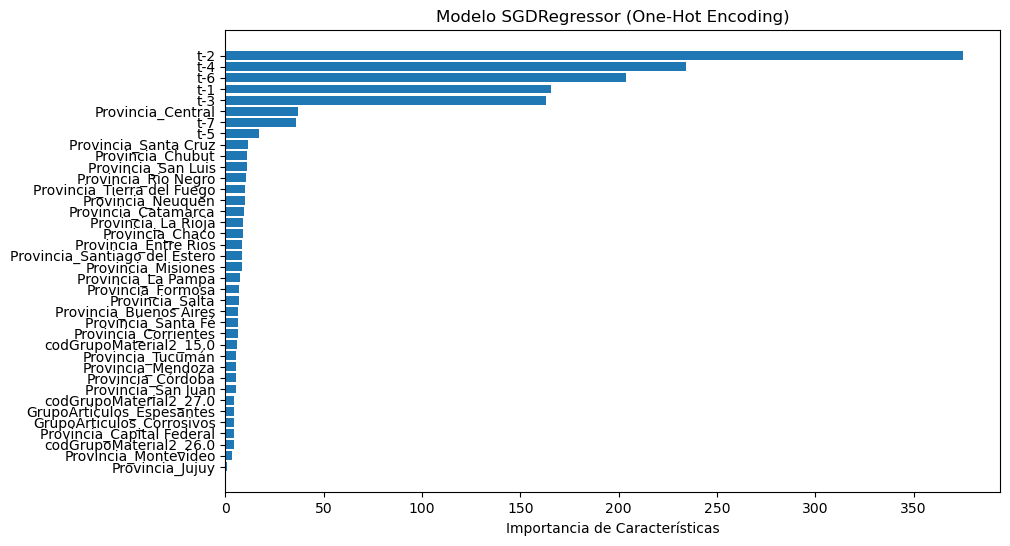

In [46]:
for model, params in zip(best_models_std, best_params_std_hot):
    importance = obtener_importancia_caracteristicas(model.set_params(**params), x_std_train_h, y_train_h)
    visualizar_importancia_caracteristicas(importance, x_std_train_h.columns, model.set_params(**params), 'One-Hot Encoding')

Para el modelo SGDRegressor se ve que las columnas con valores anteriores (lag's) son los que mayor importancia, es decir, las variables categoricas se ven opacadas por las ventas(y devoluciones).

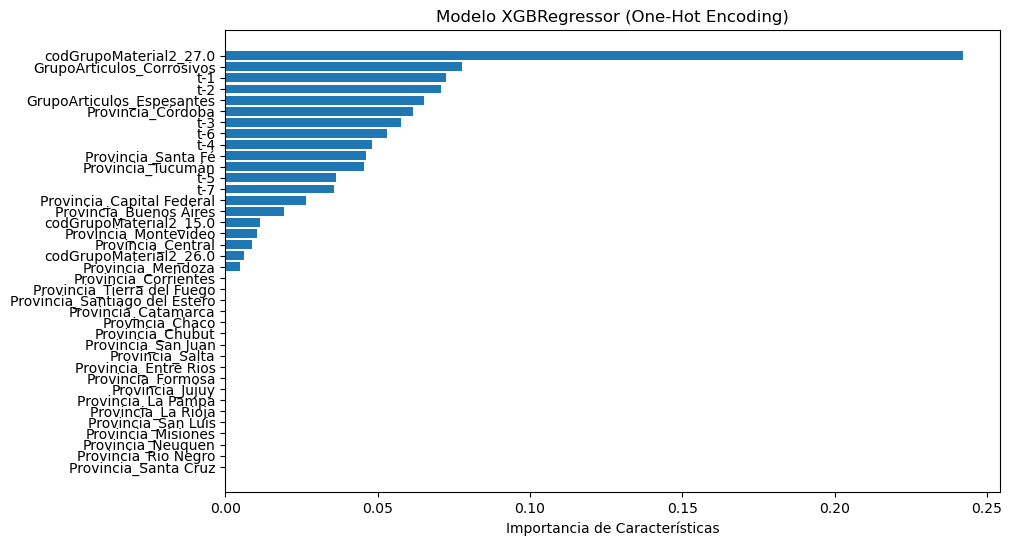

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1077
[LightGBM] [Info] Number of data points in the train set: 85059, number of used features: 38
[LightGBM] [Info] Start training from score 21.203565
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

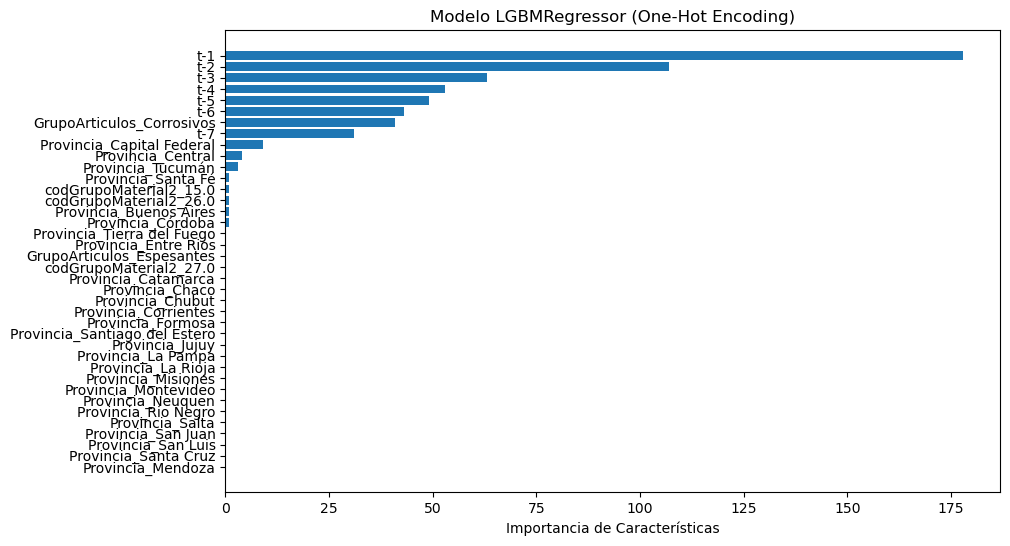

In [47]:
for model, params in zip(best_models_no_std, best_params_no_std_hot):
    importance = obtener_importancia_caracteristicas(model.set_params(**params), x_train_h, y_train_h)
    visualizar_importancia_caracteristicas(importance, x_train_h.columns, model.set_params(**params), 'One-Hot Encoding')

Sobre los modelos restantes, se puede decir que la columnas de lag's siguen manteniendo una importancia alta, pero por detras de la columnas de algunas provincias y de las correspondientes a los valores de **"GrupoArticulos"**: "Espesantes" y "Corrosivos".

Analizando los resultados sobre los datos con "Label Encoding", puede verse resultados parecidos.

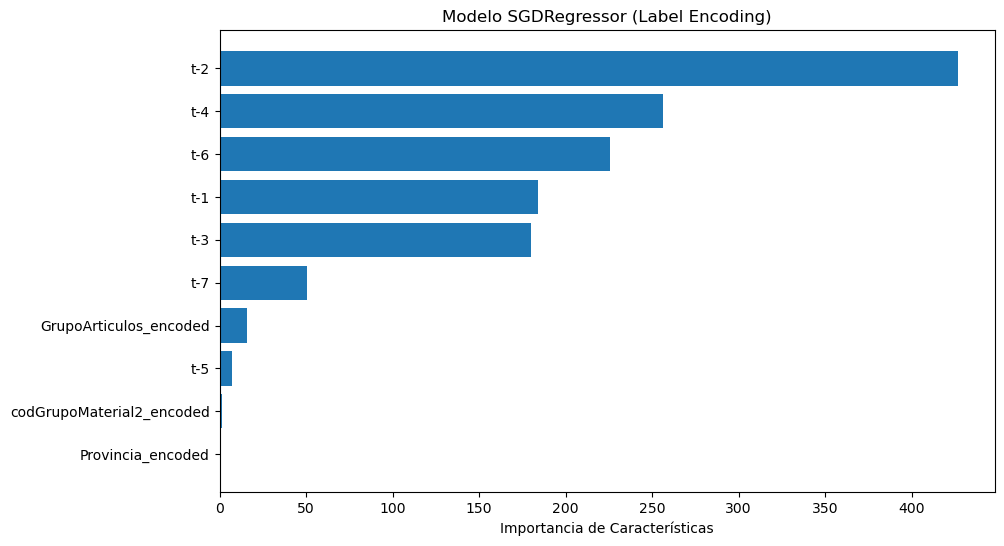

In [48]:
for model, params in zip(best_models_std, best_params_std_lab):
    importance = obtener_importancia_caracteristicas(model.set_params(**params), x_std_train_l, y_train_l)
    visualizar_importancia_caracteristicas(importance, x_std_train_l.columns, model.set_params(**params), 'Label Encoding')

Nuevamente se ve que SGDRegressor le da mucha mas importancia a los lag's que a otras variables.

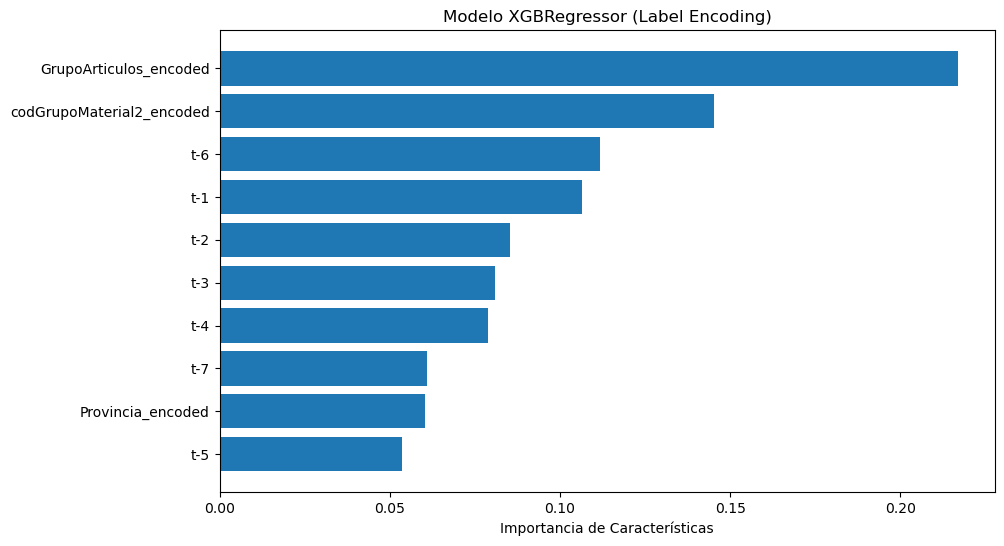

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1046
[LightGBM] [Info] Number of data points in the train set: 85059, number of used features: 10
[LightGBM] [Info] Start training from score 21.203565
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

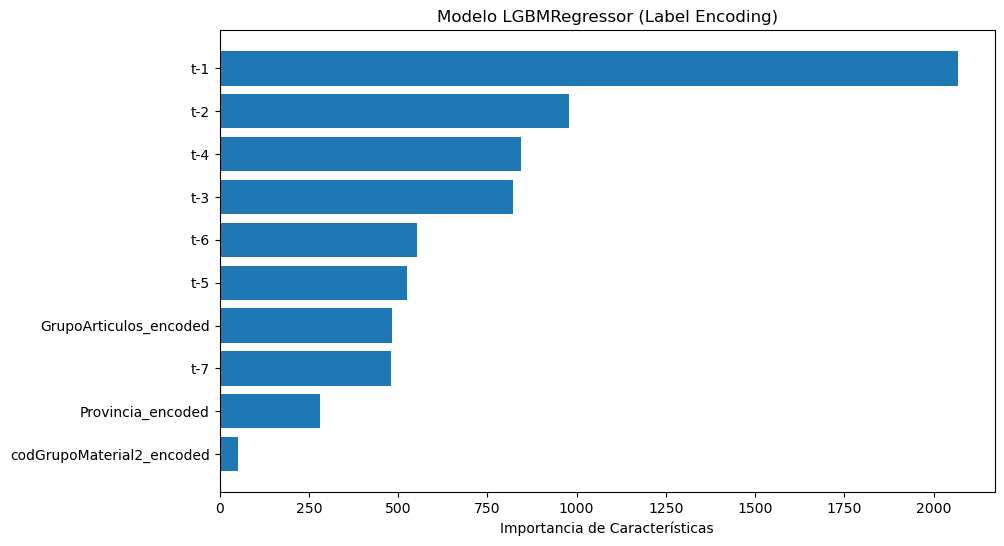

In [49]:
for model, params in zip(best_models_no_std, best_params_no_std_lab):
    importance = obtener_importancia_caracteristicas(model.set_params(**params), x_train_l, y_train_l)
    visualizar_importancia_caracteristicas(importance, x_train_l.columns, model.set_params(**params), 'Label Encoding')

Para los modelos restantes, si bien los lag's siguen manteniendo su importancia alta, la columna **"GrupoArticulos"** se posiciona como la variable mas importante. En general, en estos modelos coinciden en que la variable **"Provincia"** es la que menos aporta al modelo.

### Plots

Finalmente, vamos a realizar **dos tipos de gráficas** importantes para el proceso de Aprendizaje Supervisado:

- **Tipo Predichos vs observados**: Cuando entrenamos un modelo en un conjunto de datos, utilizamos parte de los datos para entrenar el modelo y la otra parte para evaluarlo. Después de entrenar el modelo, lo ponemos a prueba en los datos de evaluación para ver cómo se desempeña en datos no vistos. Mediante esta gráfica podemos comparar los valores predichos por el modelo con los valores observados en el conjunto de evaluación.

- **Tipo Serie temporal original versus predicha**: Esta gráfica compara los valores reales observados en la serie temporal con los valores que el modelo ha predicho para el mismo período de tiempo. La idea además es ver el comportamiento del target en el período usado para entrenamiento y ver cómo el modelo pronostica las ventas en los meses siguientes.

<span style="color: orange;">Elijan solo un dataset y realicen solo una gráfica de cada tipo e interpreten los resultados brevemente. Para el gráfico de serie temporal solo utilicen la provincia de Buenos Aires, y no olviden que para cada fecha pueden tener mas de una venta, por lo que deben sumar Cantidades</span>

In [50]:
best_model = XGBRegressor().set_params(**best_params_no_std_hot[0])
best_model.fit(x_train_h, y_train_h)
# Realiza predicciones en el conjunto de prueba
y_pred = best_model.predict(x_test_h)

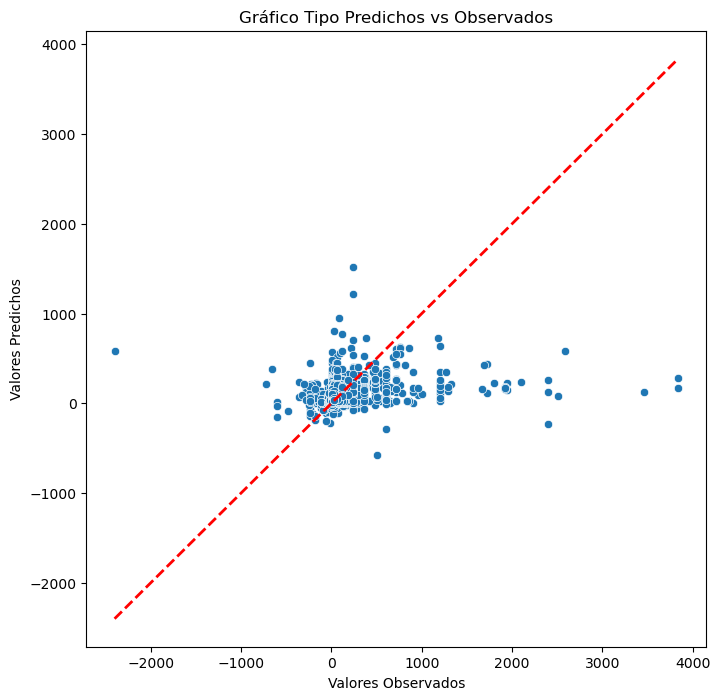

In [51]:
# Gráfica Tipo Predichos vs Observados

# Convertir y_test_h y y_pred en arrays NumPy unidimensionales
y_test_h_array = np.array(y_test_h).flatten()
y_pred_array = np.array(y_pred).flatten()

# Crea un gráfico de dispersión de Predichos vs Observados
plt.figure(figsize=(8, 8))
sns.scatterplot(x = y_test_h_array, y = y_pred_array)
plt.title('Gráfico Tipo Predichos vs Observados')
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')

# Agrega una línea de referencia de 45 grados
plt.plot([min(y_test_h_array), max(y_test_h_array)], [min(y_test_h_array), max(y_test_h_array)], linestyle='--', color='red', linewidth=2)

plt.show()

In [52]:
# Gráfica de Serie temporal original versus predicha
# Paso 1. Filtrar los datos correspondientes a la categoría 'Buenos Aires'
df_baires = df_hot[df_hot['Provincia_Buenos Aires'] == 1.0].copy().drop(['Provincia_Buenos Aires'], axis = 1)

In [53]:
# Paso 2. Crear un dataframe solo con los datos de test de Buenos Aires
df_train_buenos_aires = df_baires[df_baires.index < '2021-01-01 00:00:00']
df_test_buenos_aires = df_baires[df_baires.index >= '2021-01-01 00:00:00']

In [54]:
best_model = XGBRegressor().set_params(**best_params_no_std_hot[0])
best_model.fit(df_train_buenos_aires.drop('Cantidad', axis=1), df_train_buenos_aires['Cantidad'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [55]:
# Paso 3. Crear una columna de predichos para los datos de test de Buenos Aires
# Realizar predicciones en los datos de prueba de Buenos Aires utilizando el mejor modelo
y_pred_buenos_aires = best_model.predict(df_test_buenos_aires.drop('Cantidad', axis=1))

# Agregar las predicciones como una nueva columna llamada 'Predichos' en el DataFrame de prueba de Buenos Aires
df_test_buenos_aires['Predichos'] = y_pred_buenos_aires

In [56]:
# Paso 4. Agrupar valores para cada index y sumarlos
# Agrupar valores para cada fecha y sumar las cantidades
df_test_buenos_aires_grouped = df_test_buenos_aires.groupby(df_test_buenos_aires.index)[['Cantidad', 'Predichos']].sum()

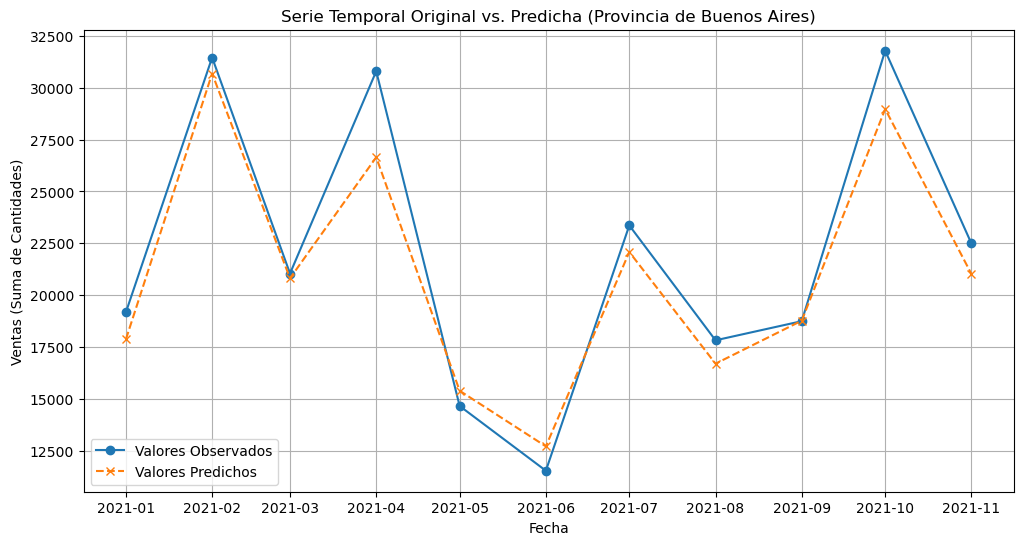

In [57]:
# Paso 5. Crear el gráfico de la serie temporal
# Crear un gráfico de serie temporal para comparar valores reales y predichos
plt.figure(figsize=(12, 6))
plt.plot(df_test_buenos_aires_grouped.index, df_test_buenos_aires_grouped['Cantidad'], label='Valores Observados', marker='o')
plt.plot(df_test_buenos_aires_grouped.index, df_test_buenos_aires_grouped['Predichos'], label='Valores Predichos', linestyle='--', marker='x')
plt.title('Serie Temporal Original vs. Predicha (Provincia de Buenos Aires)')
plt.xlabel('Fecha')
plt.ylabel('Ventas (Suma de Cantidades)')
plt.legend()
plt.grid(True)
plt.show()



Ademas los errores se mantienen en el orden de 4000 unidades y  siempre por defecto. Esto nos podria estar diciendo que, aunque el modelo no predice con una precision muy alta los valores obtenidos, puede servir muy bien para predecir tendencias.
